## Basit Doğrusal Regresyon


In [1]:
import pandas as pd
df = pd.read_csv("advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


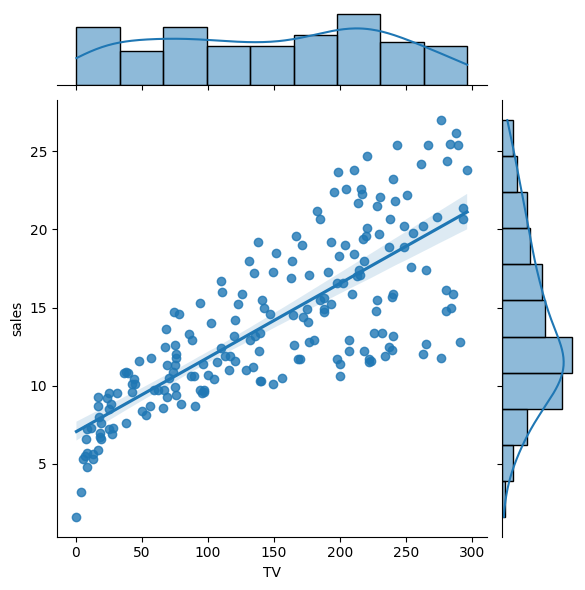

In [2]:
import seaborn as sbn
sbn.jointplot(x = "TV",y= "sales",data = df, kind="reg")

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
x = df[["TV"]] # bağımzısz değişken

In [5]:
y = df[["sales"]] # bağımlı değişken

In [6]:
reg = LinearRegression()

In [7]:
model = reg.fit(x,y)

In [8]:
dir(model) # nesne içersinden alabileceğimiz bazı bilgiler

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [9]:
model.intercept_ 

array([7.03259355])

In [10]:
model.coef_ 

array([[0.04753664]])

In [11]:
#rkare
model.score(x,y)

0.611875050850071

## Tahmin 

In [12]:
model.predict([[165]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

# Artıklar ve Makine  Öğrenmesi
## MSE : hata kareler ortalaması
## RMSE : hata kareler ortalamasının karekökü

In [17]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [15]:
model.predict(x)[0:6] #satışları tahmin eder 

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [20]:
gerceky=pd.DataFrame(y[0:10])

In [19]:
tahminy=pd.DataFrame(model.predict(x)[0:10])

In [21]:
hatalar = pd.concat([gerceky,tahminy], axis =1)

In [23]:
hatalar.columns = ["gerçek","tahmin"]

In [24]:
hatalar


,gerçek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [26]:
hatalar["hata"] = hatalar["gerçek"] - hatalar["tahmin"]

In [27]:
hatalar

,gerçek,tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [28]:
hatalar["hata kareler"] = hatalar["hata"]**2

In [29]:
hatalar

,gerçek,tahmin,hata,hata kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [32]:
import numpy as np
np.mean(hatalar["hata kareler"]) ## mean squared error (mse) değeri

9.290350329638105